In [1]:
import pandas as pd
import requests
import re
import datetime
from datetime import timedelta
import time
import numpy as np
from scipy.stats import norm
import math
from matplotlib import pyplot as plt
from datetime import timedelta
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from tensorflow.keras.layers import Dense, Dropout
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras import layers
from tensorflow.keras.layers import Dense, Dropout
import statsmodels.formula.api as smf 

In [2]:
data_df = pd.read_csv('final_df_processed_2.csv')
data_df.head()

,Unnamed: 0,property_id,sale_price,building_year_built,zip_code,Address_Google,closest_zip_1,distance_1,closest_zip_2,distance_2,...,Unemployment Rate_3,sale_price_1,sale_price_2,sale_price_3,California AGI_1,California AGI_2,California AGI_3,Labor Force_1,Labor Force_2,Labor Force_3
0,5963,8323008024,167000,1946.0,91767,"629 WASHINGTON AVE, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,14.4,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0
1,5964,8318018031,263000,1964.0,91767,"1796 MARTELLO ST, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,14.4,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0
2,5965,8366006010,176001,1952.0,91767,"2832 SUMNER AVE, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,14.4,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0
3,5966,8317037029,248000,1991.0,91767,"816 AMBER OAKS CIR, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,14.4,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0
4,5967,8323011020,184001,1948.0,91767,"631 LORANNE AVE, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,14.4,214112.037037,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0


In [3]:
data_df.columns

Index(['Unnamed: 0', 'property_id', 'sale_price', 'building_year_built',
       'zip_code', 'Address_Google', 'closest_zip_1', 'distance_1',
       'closest_zip_2', 'distance_2', 'closest_zip_3', 'distance_3', 'Month',
       'Year', 'Returns', 'California AGI', 'City_Name', 'Unemployment Rate',
       'Labor Force', 'Date', 'property_type_SINGLE FAMILY DWELLING',
       'property_type_SINGLE FAMILY RESIDENCE', 'Zip_month',
       'zip_1_Unemployment Rate_1', 'zip_1_Unemployment Rate_2',
       'zip_1_Unemployment Rate_3', 'zip_1_sale_price_1', 'zip_1_sale_price_2',
       'zip_1_sale_price_3', 'zip_1_California AGI_1',
       'zip_1_California AGI_2', 'zip_1_California AGI_3',
       'zip_1_Labor Force_1', 'zip_1_Labor Force_2', 'zip_1_Labor Force_3',
       'zip_2_Unemployment Rate_1', 'zip_2_Unemployment Rate_2',
       'zip_2_Unemployment Rate_3', 'zip_2_sale_price_1', 'zip_2_sale_price_2',
       'zip_2_sale_price_3', 'zip_2_California AGI_1',
       'zip_2_California AGI_2', 'zip

In [4]:
data_df['City'] = data_df['Address_Google'].apply(lambda x: x.split(',')[1])

In [5]:
data_df[['sale_price', 'zip_code', 'Zip_month', 'Returns', 'building_year_built', 'Unemployment Rate', 'Labor Force']].groupby(by=['zip_code', 'Zip_month']).mean()[['sale_price', 'Returns', 'building_year_built', 'Unemployment Rate', 'Labor Force']].to_csv('zip_means.csv')



In [6]:
data_df[['sale_price', 'City', 'Zip_month', 'Returns', 'building_year_built', 'Unemployment Rate', 'Labor Force']].groupby(by=['City', 'Zip_month']).mean()[['sale_price', 'Returns', 'building_year_built', 'Unemployment Rate', 'Labor Force']].to_csv('city.csv')



In [7]:
len(data_df)

692035

In [8]:
len(data_df.loc[data_df["Year"] >= 2017])

249205

In [9]:
data_df.columns

Index(['Unnamed: 0', 'property_id', 'sale_price', 'building_year_built',
       'zip_code', 'Address_Google', 'closest_zip_1', 'distance_1',
       'closest_zip_2', 'distance_2', 'closest_zip_3', 'distance_3', 'Month',
       'Year', 'Returns', 'California AGI', 'City_Name', 'Unemployment Rate',
       'Labor Force', 'Date', 'property_type_SINGLE FAMILY DWELLING',
       'property_type_SINGLE FAMILY RESIDENCE', 'Zip_month',
       'zip_1_Unemployment Rate_1', 'zip_1_Unemployment Rate_2',
       'zip_1_Unemployment Rate_3', 'zip_1_sale_price_1', 'zip_1_sale_price_2',
       'zip_1_sale_price_3', 'zip_1_California AGI_1',
       'zip_1_California AGI_2', 'zip_1_California AGI_3',
       'zip_1_Labor Force_1', 'zip_1_Labor Force_2', 'zip_1_Labor Force_3',
       'zip_2_Unemployment Rate_1', 'zip_2_Unemployment Rate_2',
       'zip_2_Unemployment Rate_3', 'zip_2_sale_price_1', 'zip_2_sale_price_2',
       'zip_2_sale_price_3', 'zip_2_California AGI_1',
       'zip_2_California AGI_2', 'zip

In [10]:
data_df['Quarter'] = data_df['Month'].apply(lambda x: 4 if x >= 9 else (3 if x >= 6 else (2 if x >= 2 else 1)))
data_df.dropna(inplace=True)
data_df.head()

,Unnamed: 0,property_id,sale_price,building_year_built,zip_code,Address_Google,closest_zip_1,distance_1,closest_zip_2,distance_2,...,sale_price_2,sale_price_3,California AGI_1,California AGI_2,California AGI_3,Labor Force_1,Labor Force_2,Labor Force_3,City,Quarter
0,5963,8323008024,167000,1946.0,91767,"629 WASHINGTON AVE, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0,POMONA,2
1,5964,8318018031,263000,1964.0,91767,"1796 MARTELLO ST, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0,POMONA,2
2,5965,8366006010,176001,1952.0,91767,"2832 SUMNER AVE, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0,POMONA,2
3,5966,8317037029,248000,1991.0,91767,"816 AMBER OAKS CIR, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0,POMONA,2
4,5967,8323011020,184001,1948.0,91767,"631 LORANNE AVE, POMONA, CA 91767, USA",91711,2.12,91768,2.48,...,232170.622642,216516.030303,631533333.0,631533333.0,631533333.0,66900.0,67000.0,66500.0,POMONA,2


In [11]:
data_df.sort_values(by='Date', inplace=True)

In [12]:
data_df.drop(columns=['Unnamed: 0', 'property_id', 'Address_Google', 'Month',
       'Year','Date'], inplace=True)

In [13]:
data_df.drop(columns=['Zip_month'], inplace=True)

In [14]:
data_df.columns

Index(['sale_price', 'building_year_built', 'zip_code', 'closest_zip_1',
       'distance_1', 'closest_zip_2', 'distance_2', 'closest_zip_3',
       'distance_3', 'Returns', 'California AGI', 'City_Name',
       'Unemployment Rate', 'Labor Force',
       'property_type_SINGLE FAMILY DWELLING',
       'property_type_SINGLE FAMILY RESIDENCE', 'zip_1_Unemployment Rate_1',
       'zip_1_Unemployment Rate_2', 'zip_1_Unemployment Rate_3',
       'zip_1_sale_price_1', 'zip_1_sale_price_2', 'zip_1_sale_price_3',
       'zip_1_California AGI_1', 'zip_1_California AGI_2',
       'zip_1_California AGI_3', 'zip_1_Labor Force_1', 'zip_1_Labor Force_2',
       'zip_1_Labor Force_3', 'zip_2_Unemployment Rate_1',
       'zip_2_Unemployment Rate_2', 'zip_2_Unemployment Rate_3',
       'zip_2_sale_price_1', 'zip_2_sale_price_2', 'zip_2_sale_price_3',
       'zip_2_California AGI_1', 'zip_2_California AGI_2',
       'zip_2_California AGI_3', 'zip_2_Labor Force_1', 'zip_2_Labor Force_2',
       'zip_2_Lab

In [15]:
data_df = pd.get_dummies(data_df, columns=['zip_code'], drop_first=True, dtype=int)



In [16]:
data_df.drop(columns=['closest_zip_1', 'closest_zip_2', 'closest_zip_3' ,'City_Name', 'City'], inplace=True)

In [36]:

train = int(0.9 * len(data_df))

test = len(data_df) - train

X_train = data_df.head(train).drop(columns=['sale_price'])

y_train = data_df.head(train)['sale_price']

X_test = data_df.tail(test).drop(columns=['sale_price'])

y_test = data_df.tail(test)['sale_price']




# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier.
rf_model = RandomForestRegressor(n_estimators=500, random_state=78) 


# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

# Making predictions using the testing data.
predictions = rf_model.predict(X_test)

train_predictions = rf_model.predict(X_train)

In [38]:
from sklearn.metrics import mean_absolute_error

# Assuming test predictions are stored in 'y_pred' and actual values in 'y_test'
mae = mean_absolute_error(data_df['sale_price'].tail(test), predictions)

print(f'Mean Absolute Error (MAE): {mae}')

# Calculate residuals (actual - predicted)
residuals = data_df['sale_price'].tail(test) - predictions

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))

print(f"RMSE: {rmse}")

Mean Absolute Error (MAE): 310779.6923246544
RMSE: 646645.1092911226


In [39]:
range(500)

range(0, 500)

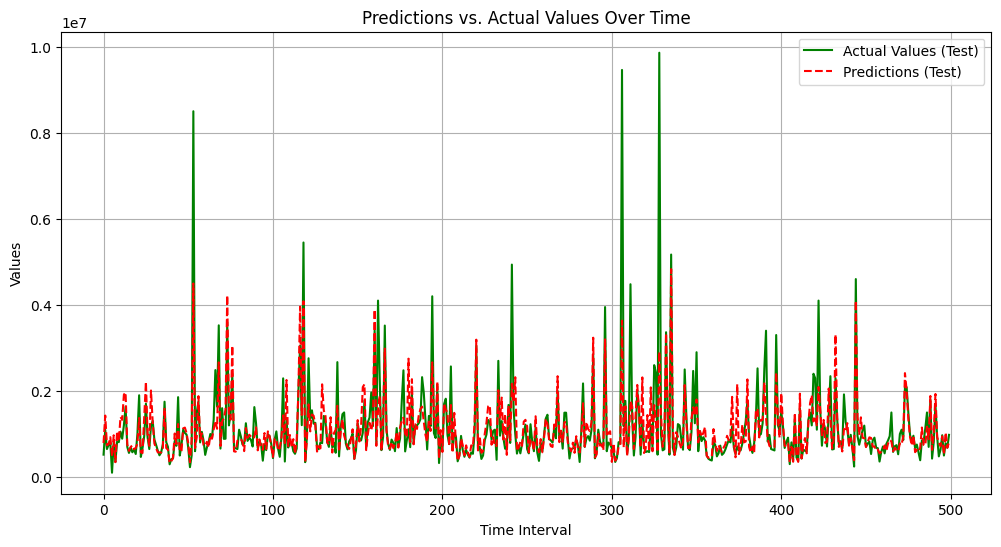

In [20]:
train_time = range(len(y_train[-500:]))
test_time = range(len(y_train), len(y_train) + len(y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(500), y_test[-500:], label='Actual Values (Test)', color='green')
plt.plot(range(500), predictions[-500:], label='Predictions (Test)', color='red', linestyle='dashed')
plt.xlabel('Time Interval')
plt.ylabel('Values')
plt.title('Predictions vs. Actual Values Over Time')
plt.legend()
plt.grid()
plt.show()

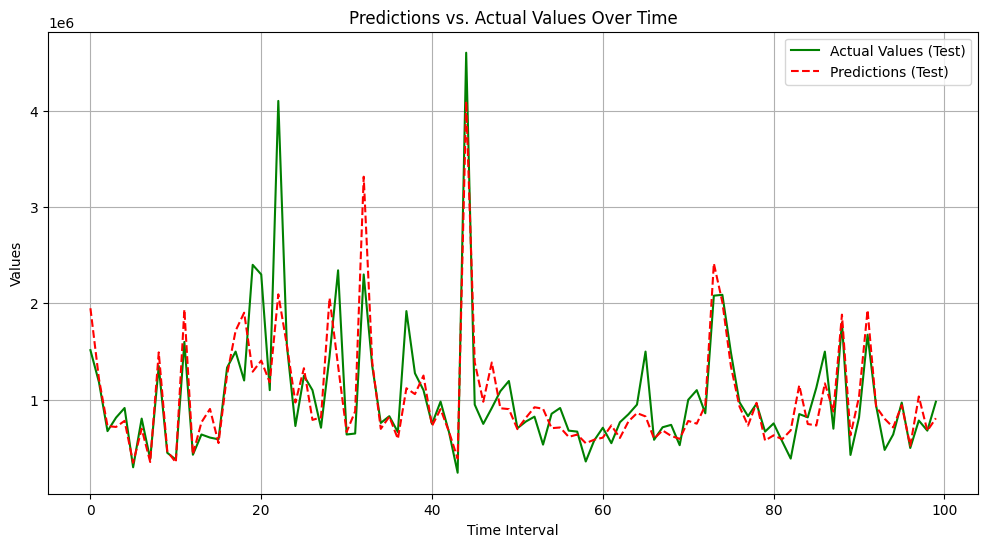

In [21]:
train_time = range(len(y_train[-100:]))
test_time = range(len(y_train), len(y_train) + len(y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(100), y_test[-100:], label='Actual Values (Test)', color='green')
plt.plot(range(100), predictions[-100:], label='Predictions (Test)', color='red', linestyle='dashed')
plt.xlabel('Time Interval')
plt.ylabel('Values')
plt.title('Predictions vs. Actual Values Over Time')
plt.legend()
plt.grid()
plt.show()

In [22]:
X_test.columns

Index(['building_year_built', 'distance_1', 'distance_2', 'distance_3',
       'Returns', 'California AGI', 'Unemployment Rate', 'Labor Force',
       'property_type_SINGLE FAMILY DWELLING',
       'property_type_SINGLE FAMILY RESIDENCE',
       ...
       'zip_code_92563', 'zip_code_92582', 'zip_code_92583', 'zip_code_92590',
       'zip_code_92591', 'zip_code_92592', 'zip_code_93534', 'zip_code_93535',
       'zip_code_93536', 'zip_code_93550'],
      dtype='object', length=310)

In [23]:
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': rf_model.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                    Feature    Importance
49             sale_price_1  2.802317e-01
0       building_year_built  1.955674e-01
51             sale_price_3  1.238519e-01
50             sale_price_2  5.022308e-02
18   zip_1_California AGI_3  2.040181e-02
..                      ...           ...
155          zip_code_90623  2.213051e-08
156          zip_code_90630  1.015013e-08
283          zip_code_92258  4.888429e-09
106          zip_code_90071  3.042245e-09
281          zip_code_92241  5.018833e-10

[310 rows x 2 columns]


In [44]:
train_optimize = int(0.5 * train)

test_optimize = train - train_optimize

X_train = data_df[:300000].drop(columns=['sale_price'])

y_train = data_df[:300000]['sale_price']

X_test = data_df[300000:360000].drop(columns=['sale_price'])

y_test = data_df[300000:360000]['sale_price']

from sklearn.inspection import permutation_importance

# Instantiate and train your RandomForestRegressor model
model = RandomForestRegressor(n_estimators = 500, random_state=78)
model.fit(X_train, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Retrieve the importance scores and feature names
importance_scores = perm_importance.importances_mean
feature_names = X_train.columns

# Print the feature importance scores
for feature, importance in zip(feature_names, importance_scores):
    print(f"{feature}: {importance}")


building_year_built: 0.26394697654865085
distance_1: 0.005926424866914803
distance_2: 0.015416228311231472
distance_3: 0.10628191749924412
Returns: 0.001067607998664799
California AGI: -0.00018367509185096553
Unemployment Rate: -0.00038047569858689067
Labor Force: -3.3374731017499214e-06
property_type_SINGLE FAMILY DWELLING: 0.23933712231697082
property_type_SINGLE FAMILY RESIDENCE: 0.4396250798373257
zip_1_Unemployment Rate_0: -0.004844873158815999
zip_1_Unemployment Rate_1: -0.0004040760286570189
zip_1_Unemployment Rate_2: 0.00044291100718897304
zip_1_Unemployment Rate_3: -0.0010629596104558714
zip_1_sale_price_0: 8.803318546104499e-05
zip_1_sale_price_1: 0.014883334270643478
zip_1_sale_price_2: 0.004682646427824488
zip_1_sale_price_3: 0.006906645990959981
zip_1_California AGI_0: 0.000501220190784879
zip_1_California AGI_1: 0.00030297065835139804
zip_1_California AGI_2: 0.00034681922703211354
zip_1_California AGI_3: 0.00097104030823294
zip_1_Labor Force_0: 0.001092315939247679
zip_1_

In [45]:
# create dataframe of feature importance with most importance being at the top

feature_dict = {'Features': [], 'Importance': []}

# Print the feature importance scores
for feature, importance in zip(feature_names, importance_scores):
    
    feature_dict['Features'].append(feature)
    feature_dict['Importance'].append(importance)
    
feature_df = pd.DataFrame.from_dict(feature_dict)

feature_df = feature_df.sort_values(by='Importance', ascending=False)

feature_df

,Features,Importance
9,property_type_SINGLE FAMILY RESIDENCE,0.439625
61,sale_price_1,0.288209
0,building_year_built,0.263947
8,property_type_SINGLE FAMILY DWELLING,0.239337
3,distance_3,0.106282
...,...,...
54,zip_3_Labor Force_0,-0.002151
26,zip_2_Unemployment Rate_0,-0.003033
319,zip_code_93535,-0.003927
10,zip_1_Unemployment Rate_0,-0.004845


In [24]:
train = int(0.9 * len(data_df))

test = len(data_df) - train

X_train = data_df.head(train).drop(columns=['sale_price'])

y_train = data_df.head(train)['sale_price']

X_test = data_df.tail(test).drop(columns=['sale_price'])

y_test = data_df.tail(test)['sale_price']

In [17]:
var = ['building_year_built',
 'zip_1_sale_price_3',
 'property_type_SINGLE FAMILY RESIDENCE',
 'sale_price_2',
 'zip_3_sale_price_2',
 'zip_2_sale_price_1',
 'distance_3',
 'zip_3_sale_price_3',
 'zip_1_sale_price_2',
 'zip_2_sale_price_3',
 'zip_1_sale_price_1',
 'distance_2',
 'distance_1',
 'property_type_SINGLE FAMILY DWELLING',
 'Labor Force',
 'zip_code_91351',
 'zip_1_Labor Force_3',
 'Labor Force_2',
 'zip_code_91406',
 'California AGI',
 'Labor Force_1',
 'zip_code_90008',
 'zip_code_91702',
 'zip_code_90638',
 'zip_code_91335',
 'zip_3_Labor Force_3',
 'zip_code_90032',
 'Returns',
 'zip_3_California AGI_3',
 'zip_1_Labor Force_1',
 'zip_code_91301',
 'zip_code_91201',
 'zip_code_90706',
 'zip_1_Labor Force_2',
 'zip_2_Labor Force_1',
 'Labor Force_3',
 'California AGI_1',
 'zip_3_Labor Force_2',
 'zip_3_California AGI_2',
 'zip_1_California AGI_1',
 'zip_code_90806',
 'zip_code_90745',
 'Quarter',
 'zip_1_California AGI_3',
 'California AGI_2',
 'zip_code_90280',
 'zip_code_90042',
 'zip_code_90301',
 'zip_code_91325',
 'zip_code_90804',
 'zip_code_91732',
 'zip_code_91304',
 'zip_code_90302',
 'zip_code_91791',
 'zip_code_91706',
 'zip_code_92509',
 'zip_code_90640',
 'zip_code_91206',
 'zip_code_90802',
 'zip_code_91767',
 'zip_code_91776',
 'zip_code_92260',
 'zip_code_90606',
 'zip_code_90303',
 'zip_code_91765',
 'zip_code_90041',
 'zip_code_90813',
 'zip_code_90201',
 'zip_code_91750',
 'zip_code_90037',
 'zip_code_91733',
 'zip_code_92240',
 'zip_code_90805',
 'zip_code_91107',
 'zip_2_Labor Force_3',
 'zip_code_91605',
 'zip_code_90275',
 'zip_code_91723',
 'zip_code_90249',
 'zip_code_91501',
 'zip_code_91766',
 'zip_code_90033',
 'zip_code_93535',
 'zip_code_90027',
 'zip_code_90603',
 'zip_code_90065',
 'zip_code_90057',
 'zip_code_90210',
 'zip_code_91741',
 'zip_code_90732',
 'zip_code_92504',
 'zip_code_90068',
 'zip_code_91356',
 'zip_code_90036',
 'zip_code_91324',
 'zip_code_92592',
 'zip_code_91326',
 'zip_code_91436',
 'zip_code_90022',
 'zip_code_91367',
 'zip_code_91724',
 'zip_code_90502',
 'zip_code_91711',
 'zip_code_90026',
 'zip_code_92583',
 'zip_code_91401',
 'zip_code_90405',
 'zip_code_90650',
 'zip_code_90250',
 'zip_code_91506',
 'zip_code_92210',
 'zip_code_90712',
 'zip_code_90017',
 'zip_code_90018',
 'zip_code_91754',
 'zip_code_92544',
 'zip_code_91502',
 'zip_code_92591',
 'zip_code_91775',
 'zip_code_91361',
 'zip_code_90039',
 'zip_code_90247',
 'zip_code_90025',
 'zip_code_90241',
 'zip_code_90814',
 'zip_code_90807',
 'zip_code_91792',
 'zip_code_91042',
 'zip_code_91202',
 'zip_code_90048',
 'zip_code_90045',
 'zip_code_93534',
 'zip_code_91207',
 'zip_code_90815',
 'zip_code_90044',
 'zip_code_91606',
 'zip_code_90035',
 'zip_code_90716',
 'zip_code_91311',
 'zip_code_90660',
 'zip_code_91731',
 'zip_code_91387',
 'zip_code_90260',
 'zip_code_91770',
 'zip_code_90094',
 'zip_code_91790',
 'zip_code_91780',
 'zip_code_92557',
 'zip_code_91101',
 'zip_code_90211',
 'zip_code_91768',
 'zip_code_90222',
 'zip_code_90232',
 'zip_code_90043',
 'zip_code_91740',
 'zip_code_91755',
 'zip_code_90061',
 'zip_code_90703',
 'zip_code_90723',
 'zip_code_90063',
 'zip_code_90715',
 'zip_code_90255',
 'zip_code_90012',
 'zip_code_90504',
 'zip_code_91352',
 'zip_code_92543',
 'zip_code_90270',
 'zip_code_90810',
 'zip_code_91744',
 'zip_code_91303',
 'zip_code_90047',
 'zip_code_92236',
 'zip_code_90015',
 'zip_code_90305',
 'zip_code_90670',
 'zip_code_90713',
 'zip_code_90505',
 'zip_code_91803',
 'zip_code_91040',
 'zip_code_90248',
 'zip_code_91362',
 'zip_code_90746',
 'zip_code_92258',
 'zip_code_92202',
 'zip_code_92241',
 'zip_code_91709',
 'zip_code_90623',
 'zip_code_90630',
 'zip_code_90071',
 'zip_code_90401',
 'zip_code_90013',
 'zip_code_90014',
 'zip_code_90021',
 'zip_code_90058',
 'zip_code_90704',
 'zip_code_92553',
 'zip_code_91306',
 'zip_code_91773',
 'zip_code_90056',
 'zip_code_90062',
 'zip_code_92551',
 'zip_code_91746',
 'zip_code_92590',
 'zip_code_90262',
 'zip_code_90242',
 'zip_code_93550',
 'zip_code_90710',
 'zip_code_91722',
 'zip_code_90717',
 'zip_code_90016',
 'zip_code_90808',
 'zip_code_90501',
 'zip_code_90245',
 'zip_code_93536',
 'zip_code_90031',
 'zip_code_91504',
 'zip_code_90631',
 'zip_code_90278',
 'zip_code_90059',
 'zip_code_90604',
 'zip_code_90028',
 'zip_code_90220',
 'zip_code_90744',
 'zip_code_90503',
 'zip_code_91010',
 'zip_code_92506',
 'zip_code_90254',
 'zip_code_92508',
 'zip_code_91030',
 'zip_code_91106',
 'zip_code_91403',
 'zip_code_91364',
 'zip_code_90230',
 'zip_code_90023',
 'zip_code_90701',
 'zip_code_90404',
 'zip_code_91607',
 'zip_code_91505',
 'zip_code_90274',
 'zip_code_92503',
 'zip_code_91208',
 'zip_code_90304',
 'zip_code_91108',
 'zip_code_90277',
 'zip_code_90403',
 'zip_code_92501',
 'zip_code_92507',
 'zip_code_92562',
 'zip_code_90266',
 'zip_code_91411',
 'zip_code_92582',
 'zip_code_90402',
 'zip_code_92203',
 'zip_code_90038',
 'zip_code_90046',
 'zip_code_90040',
 'zip_code_92253',
 'zip_code_91316',
 'zip_code_91801',
 'zip_code_90011',
 'zip_code_90069',
 'zip_code_91103',
 'zip_code_90272',
 'zip_code_90077',
 'zip_code_90049',
 'zip_code_91602',
 'zip_code_92201',
 'zip_code_91405',
 'zip_code_90731',
 'zip_1_California AGI_2',
 'zip_code_90064',
 'zip_code_90803',
 'zip_code_91604',
 'zip_code_91007',
 'zip_code_90755',
 'zip_code_92223',
 'zip_code_91423',
 'zip_code_90240']


In [18]:
train = int(0.9 * len(data_df))

test = len(data_df) - train

X_train = data_df.head(train)[var]

y_train = data_df.head(train)['sale_price']

X_test = data_df.tail(test)[var]

y_test = data_df.tail(test)['sale_price']

In [41]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


regressor = GradientBoostingRegressor(n_estimators=300,
learning_rate=0.01,
max_features='sqrt',
max_depth=10,
min_samples_split=5,              
random_state=0)
regressor.fit(X_train, y_train.ravel())

predictions = regressor.predict(X_test)

# Making predictions using the testing data.
predictions = regressor.predict(X_test)

train_predictions = regressor.predict(X_train)





In [19]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


regressor = GradientBoostingRegressor(n_estimators=500,
learning_rate=0.01,
max_features='log2',
max_depth=100,
min_samples_split=2,              
random_state=0)
regressor.fit(X_train, y_train.ravel())

predictions = regressor.predict(X_test)

# Making predictions using the testing data.
predictions = regressor.predict(X_test)

train_predictions = regressor.predict(X_train)





In [20]:
# Calculate residuals (actual - predicted)
residuals = data_df['sale_price'].tail(test) - predictions

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))

print(f"RMSE: {rmse}")

# Assuming test predictions are stored in 'y_pred' and actual values in 'y_test'
mae = mean_absolute_error(data_df['sale_price'].tail(test), predictions)

print(f'Mean Absolute Error (MAE): {mae}')

data_df['Predictions'] = train_predictions.tolist() + predictions.tolist()

RMSE: 663038.1051591896
Mean Absolute Error (MAE): 304318.16257843236


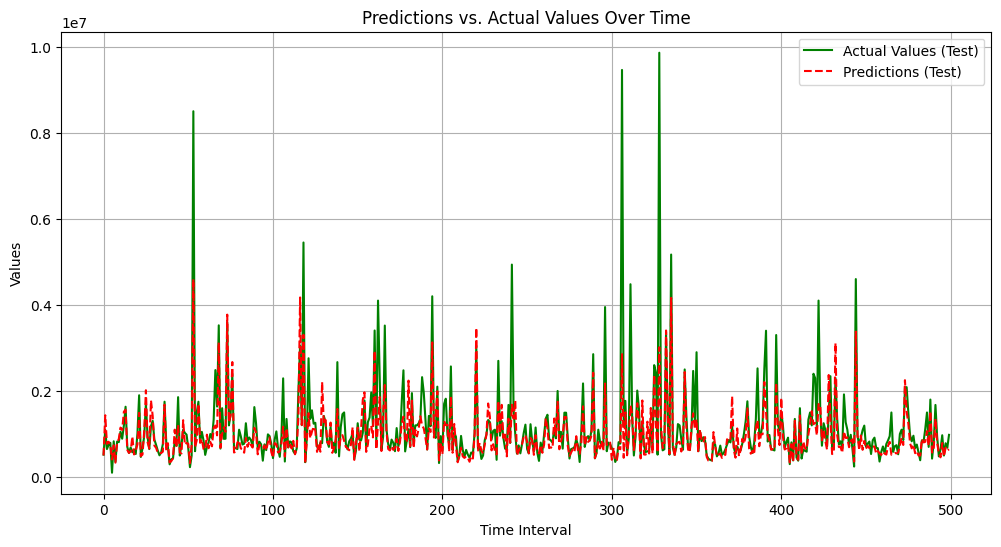

In [21]:
train_time = range(len(y_train[-500:]))
test_time = range(len(y_train), len(y_train) + len(y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(500), y_test[-500:], label='Actual Values (Test)', color='green')
plt.plot(range(500), predictions[-500:], label='Predictions (Test)', color='red', linestyle='dashed')
plt.xlabel('Time Interval')
plt.ylabel('Values')
plt.title('Predictions vs. Actual Values Over Time')
plt.legend()
plt.grid()
plt.show()

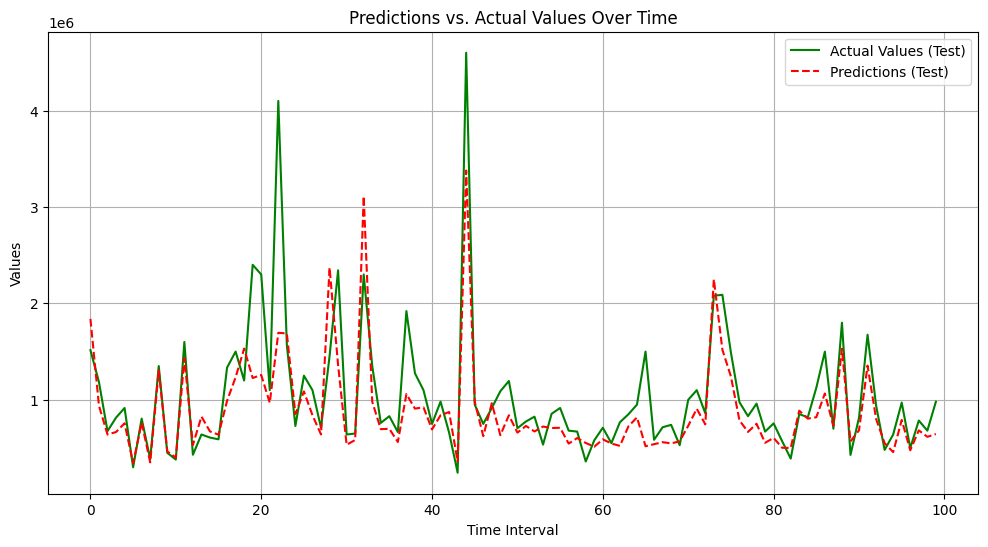

In [22]:
train_time = range(len(y_train[-100:]))
test_time = range(len(y_train), len(y_train) + len(y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(100), y_test[-100:], label='Actual Values (Test)', color='green')
plt.plot(range(100), predictions[-100:], label='Predictions (Test)', color='red', linestyle='dashed')
plt.xlabel('Time Interval')
plt.ylabel('Values')
plt.title('Predictions vs. Actual Values Over Time')
plt.legend()
plt.grid()
plt.show()

In [31]:
validation = data_df.tail(test)

validation.head()

,sale_price,building_year_built,distance_1,distance_2,distance_3,Returns,California AGI,Unemployment Rate,Labor Force,property_type_SINGLE FAMILY DWELLING,...,zip_code_92582,zip_code_92583,zip_code_92590,zip_code_92591,zip_code_92592,zip_code_93534,zip_code_93535,zip_code_93536,zip_code_93550,Predictions
610644,2082020,2020.0,3.72,4.12,4.14,17552,1996255333,11.4,1985900,0,...,0,0,0,0,0,0,0,0,0,1.381161e+06
122620,700000,1985.0,3.63,5.37,5.67,18786,920913473,13.7,30100,1,...,0,0,0,0,0,0,0,0,0,3.588725e+05
643501,550005,1976.0,1.89,2.51,2.64,14383,751844426,11.8,49800,0,...,0,0,0,0,0,0,0,0,0,6.147438e+05
651892,1045010,1957.0,3.00,3.15,3.26,20830,1009913076,11.4,1985900,0,...,0,0,0,0,0,0,0,0,0,7.302532e+05
204570,435000,1955.0,1.65,3.51,3.64,23614,1318281072,9.7,154100,1,...,0,0,0,0,0,0,0,0,0,5.175615e+05


In [33]:
extract = pd.read_csv('final_df_processed_2.csv')

extract['Quarter'] = extract['Month'].apply(lambda x: 4 if x >= 9 else (3 if x >= 6 else (2 if x >= 2 else 1)))
extract.dropna(inplace=True)


extract.sort_values(by='Date', inplace=True)

extract = extract.tail(test)

In [38]:
validation.head(1).values.tolist()

[[2082020.0,
  2020.0,
  3.72,
  4.12,
  4.14,
  17552.0,
  1996255333.0,
  11.4,
  1985900.0,
  0.0,
  1.0,
  17.1,
  18.8,
  18.0,
  1039712.0638297872,
  795026.6153846154,
  824507.7234042553,
  2031484040.0,
  2031484040.0,
  2031484040.0,
  2080100.0,
  2086300.0,
  2041400.0,
  17.1,
  18.8,
  18.0,
  825650.7142857143,
  812941.0,
  864313.7222222222,
  1153786631.0,
  1153786631.0,
  1153786631.0,
  2080100.0,
  2086300.0,
  2041400.0,
  17.1,
  18.8,
  18.0,
  999990.9629629628,
  980031.0434782607,
  890770.3333333334,
  1696496265.0,
  1696496265.0,
  1696496265.0,
  2080100.0,
  2086300.0,
  2041400.0,
  17.1,
  18.8,
  18.0,
  1205041.58,
  1156379.4210526317,
  1209896.3076923075,
  1996255333.0,
  1996255333.0,
  1996255333.0,
  2080100.0,
  2086300.0,
  2041400.0,
  4.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0

In [54]:
validation['zip_code'] = extract['zip_code'].tolist()

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_37691/1967676602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['zip_code'] = extract['zip_code'].tolist()


In [59]:
validation['Error'] = abs(validation['sale_price'] - validation['Predictions']) / validation['sale_price']

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_37691/4138969822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Error'] = abs(validation['sale_price'] - validation['Predictions']) / validation['sale_price']


In [144]:
validation.groupby(by='zip_code').mean()[['Error']].sort_values(by='Error').head(10)

,Error
zip_code,
90248,0.104926
90604,0.111705
90712,0.120978
90638,0.132546
90249,0.136457
90504,0.137731
90606,0.137982
91722,0.140479
90713,0.141881


In [142]:
validation.groupby(by='zip_code').mean()[['Error']].sort_values(by='Error', ascending=False).head(10)

,Error
zip_code,
92241,1.567972
92236,0.995147
92258,0.966852
91101,0.925556
92202,0.892388
91106,0.780661
92240,0.757818
90301,0.747383
90017,0.734598


In [94]:
len(data_df)

692035

In [100]:
len(test)

692035

In [101]:
train = int(0.9 * len(test))

test_2 = len(test) - train

In [99]:


test = pd.read_csv('final_df_processed_2.csv')

test['Quarter'] = test['Month'].apply(lambda x: 4 if x >= 9 else (3 if x >= 6 else (2 if x >= 2 else 1)))
test.dropna(inplace=True)


test.sort_values(by='Date', inplace=True)

In [102]:
len(test.head(train).loc[test['zip_code'] == 90248][['Year']])

515

In [103]:
len(test.tail(test_2).loc[test['zip_code'] == 90248][['Year']])

65

In [104]:
test.head(train).loc[test['zip_code'] == 92236][['Year', 'Date']]

,Year,Date
424506,2010,2010-05-03
424507,2010,2010-05-03
424508,2010,2010-05-05
424510,2010,2010-05-06
424509,2010,2010-05-06
...,...,...
427736,2020,2020-10-15
427737,2020,2020-10-16
427739,2020,2020-10-20
427738,2020,2020-10-20


In [105]:
test.tail(test_2).loc[test['zip_code'] == 92236][['Year', 'Date']]

,Year,Date
427741,2020,2020-10-23
427742,2020,2020-10-23
427743,2020,2020-10-23
427744,2020,2020-10-23
427745,2020,2020-10-23
...,...,...
428039,2021,2021-10-08
428040,2021,2021-10-12
428041,2021,2021-10-14
428042,2021,2021-10-19


In [106]:
test.loc[test['zip_code'] == 92241][['Year', 'Date']]

,Year,Date
692017,2018,2018-03-02
692018,2018,2018-06-20
692019,2018,2018-11-15
692020,2019,2019-08-08
692023,2020,2020-06-01
692021,2020,2020-06-01
692022,2020,2020-06-01
692025,2020,2020-06-01
692024,2020,2020-06-01
692026,2020,2020-07-24


In [111]:


test.head(train).loc[test['zip_code'] == 92241][['Year', 'Date']]

,Year,Date
692017,2018,2018-03-02
692018,2018,2018-06-20
692019,2018,2018-11-15
692020,2019,2019-08-08
692023,2020,2020-06-01
692021,2020,2020-06-01
692022,2020,2020-06-01
692025,2020,2020-06-01
692024,2020,2020-06-01
692026,2020,2020-07-24


In [110]:


test.tail(test_2).loc[test['zip_code'] == 92241][['Year', 'Date']]

,Year,Date
692028,2020,2020-10-26
692029,2020,2020-12-16
692030,2020,2020-12-16
692031,2020,2020-12-28
692032,2021,2021-03-11
692033,2021,2021-04-16
692034,2021,2021-06-09
